<a href="https://colab.research.google.com/github/vedmara/Colab/blob/main/Assignment_Machine_Learning_with_Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BACKGROUND:

The data is a marketing campaign data of a skin care clinic associated with its success.

Description of variables-

          Success: Response to marketing campaign of Skin Care Clinic which offers both products and services. (1: email Opened, 0: email not opened)

          AGE: Age Group of Customer

          Recency_Service: Number of days since last service purchase

          Recency_Product: Number of days since last product purchase

          Bill_Service: Total bill amount for service in last 3 months

          Bill_Product: Total bill amount for products in last 3 months

          Gender (1: Male, 2: Female)

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#BLR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#NB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
#svm
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [174]:
data=pd.read_csv("/content/drive/MyDrive/Springboard_Python/Email Campaign.csv")
data.head()

,SN,Gender,AGE,Recency_Service,Recency_Product,Bill_Service,Bill_Product,Success
0,1,1,<=45,12,11,11.82,2.68,0
1,2,2,<=30,6,0,10.31,1.32,0
2,3,1,<=30,1,9,7.43,0.49,0
3,4,1,<=45,2,14,13.68,1.85,0
4,5,2,<=30,0,11,4.56,1.01,1


**Data Description**

In [175]:
data[['Gender', 'Success']] = data[['Gender', 'Success']].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SN               683 non-null    int64   
 1   Gender           683 non-null    category
 2   AGE              683 non-null    object  
 3   Recency_Service  683 non-null    int64   
 4   Recency_Product  683 non-null    int64   
 5   Bill_Service     683 non-null    float64 
 6   Bill_Product     683 non-null    float64 
 7   Success          683 non-null    category
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 33.7+ KB


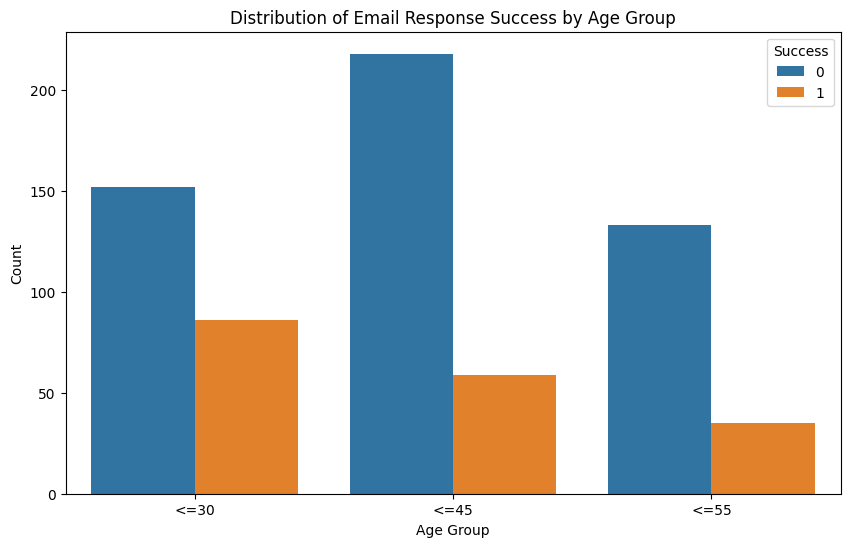

In [177]:
data['AGE'] = data['AGE'].astype('category')
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='AGE', hue='Success')
plt.title('Distribution of Email Response Success by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Success', loc='upper right')
plt.show()

The count plot shows that the majority of customers who did not open the email are in the <=45 age group. There is a noticeable drop in both opened and not opened emails as the age increases.

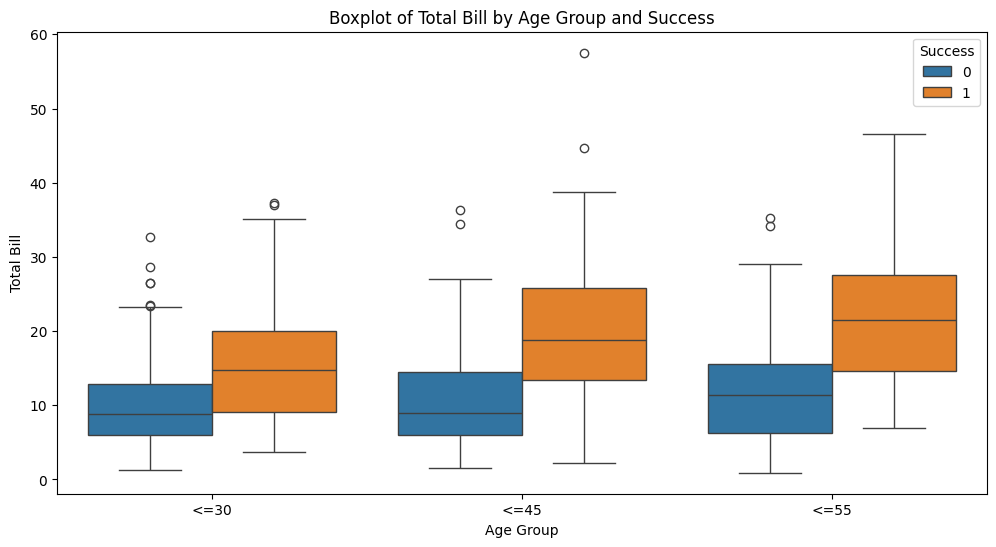

In [178]:
data['Total_Bill'] = data['Bill_Service'] + data['Bill_Product']

# Boxplot of derived variables grouped by AGE
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE', y='Total_Bill', hue='Success', data=data)
plt.title('Boxplot of Total Bill by Age Group and Success')
plt.xlabel('Age Group')
plt.ylabel('Total Bill')
plt.legend(title='Success', loc='upper right')
plt.show()

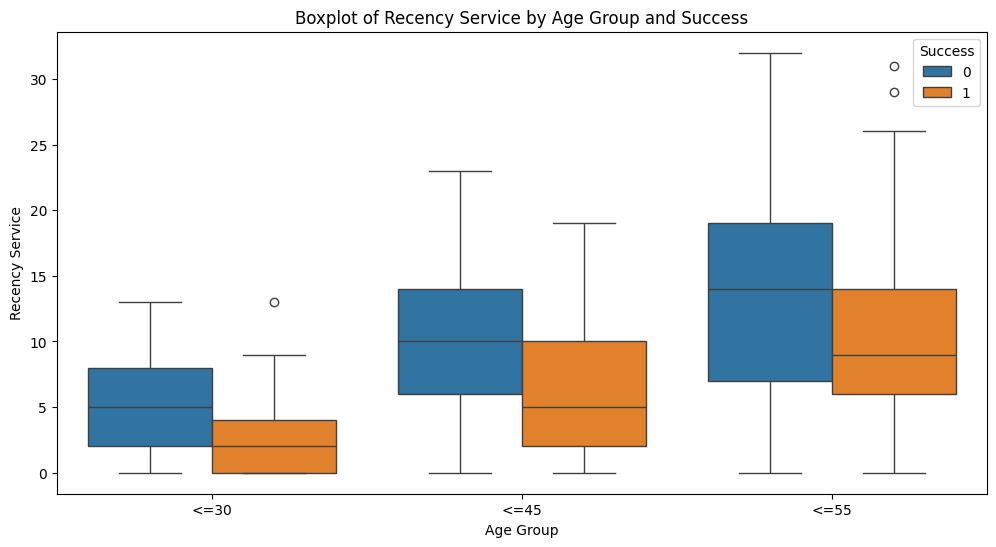

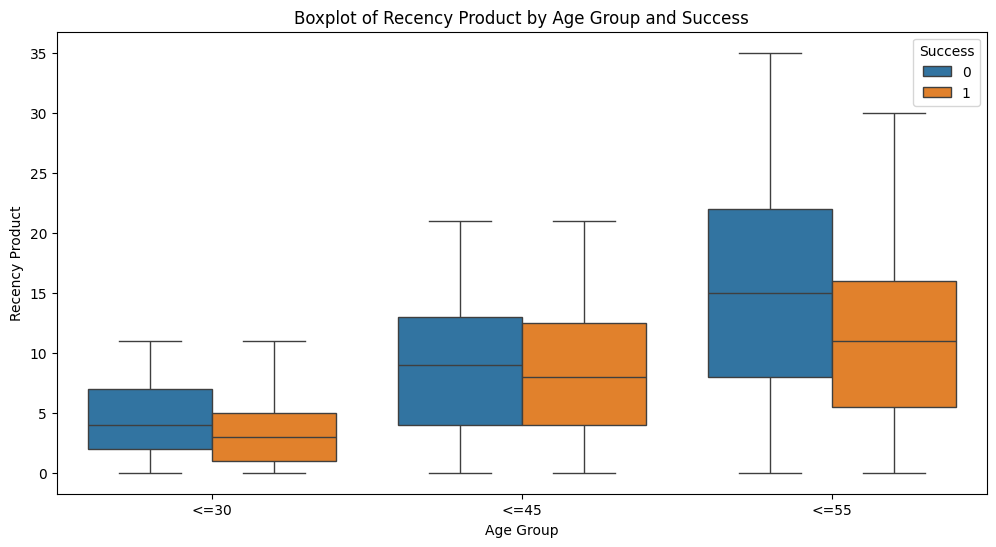

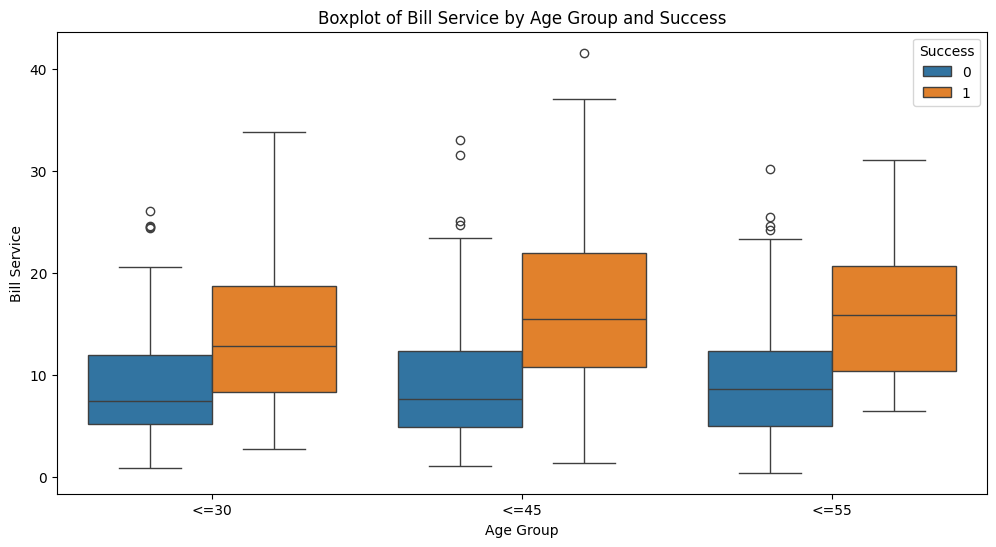

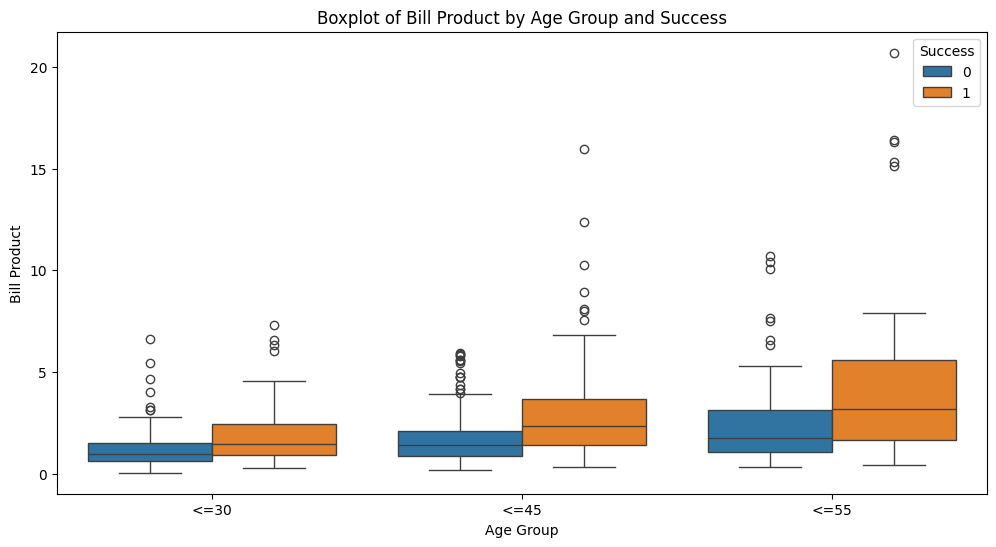

In [179]:
# Boxplot for Recency_Service
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE', y='Recency_Service', hue='Success', data=data)
plt.title('Boxplot of Recency Service by Age Group and Success')
plt.xlabel('Age Group')
plt.ylabel('Recency Service')
plt.legend(title='Success', loc='upper right')
plt.show()

# Boxplot for Recency_Product
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE', y='Recency_Product', hue='Success', data=data)
plt.title('Boxplot of Recency Product by Age Group and Success')
plt.xlabel('Age Group')
plt.ylabel('Recency Product')
plt.legend(title='Success', loc='upper right')
plt.show()

# Boxplot for Bill_Service
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE', y='Bill_Service', hue='Success', data=data)
plt.title('Boxplot of Bill Service by Age Group and Success')
plt.xlabel('Age Group')
plt.ylabel('Bill Service')
plt.legend(title='Success', loc='upper right')
plt.show()

# Boxplot for Bill_Product
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE', y='Bill_Product', hue='Success', data=data)
plt.title('Boxplot of Bill Product by Age Group and Success')
plt.xlabel('Age Group')
plt.ylabel('Bill Product')
plt.legend(title='Success', loc='upper right')
plt.show()

Bill Product: Higher bill amounts for products tend to correlate with success across all age groups, but are especially noticeable in the 30 to 55 age range. Likewise, higher service bills are associated with success, especially in the >=30 and <=55 age groups.
Recency Product: For the <=30 and <=45 age groups, recency of product purchase doesn't show a strong differentiation by success. However, for the <=55 group, those who responded positively have a wider range of days since their last product purchase.
Recency Service: Success tends to be associated with more recent service purchases across all age groups, with a clearer trend in the <=30 and <=45 groups.

In [180]:
# Convert categorical variables to numerical representation
data = pd.get_dummies(data, columns=['AGE'], drop_first=True)
# Define features (independent variables) and target variable
X = data.drop(columns=['Success'])
y = data['Success']

In [181]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model using the entire dataset
model.fit(X, y)

# Make predictions on the entire dataset
y_prob = model.predict_proba(X)[:, 1]
y_pred = model.predict(X)
print("Logistic Regression:")
print(classification_report(y, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       503
           1       0.67      0.49      0.57       180

    accuracy                           0.80       683
   macro avg       0.75      0.70      0.72       683
weighted avg       0.79      0.80      0.79       683



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
# Calculate AUC
logistic_auc = roc_auc_score(y, y_prob)
print("AUC:", logistic_auc)

AUC: 0.8543516677711509


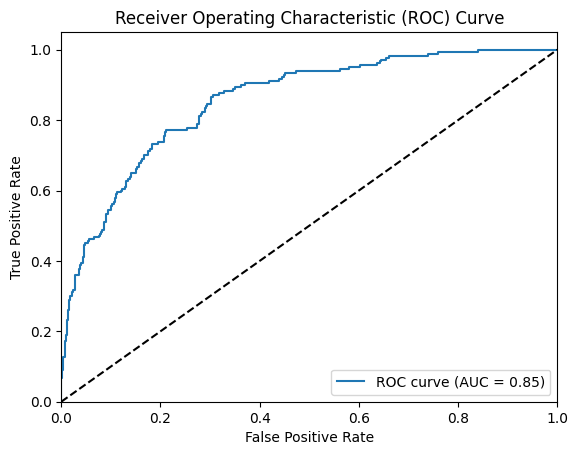

In [183]:
# Plot ROC curve
logistic_fpr, logistic_tpr, thresholds = roc_curve(y, y_prob)
plt.plot(logistic_fpr, logistic_tpr, label='ROC curve (AUC = %0.2f)' % logistic_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [184]:
# Naive Bayes
naive_bayes_model = GaussianNB()

# Train the Naïve Bayes model using the entire dataset
naive_bayes_model.fit(X, y)

# Make predictions on the entire dataset
y_prob_naive = naive_bayes_model.predict_proba(X)[:, 1]
y_pred_naive = naive_bayes_model.predict(X)
print("Naive Bayes:")
print(classification_report(y, y_pred_naive))

Naive Bayes:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       503
           1       0.60      0.42      0.50       180

    accuracy                           0.77       683
   macro avg       0.71      0.66      0.68       683
weighted avg       0.76      0.77      0.76       683



In [185]:
naive_bayes_auc = roc_auc_score(y, y_prob_naive)
print("Naïve Bayes AUC:", naive_bayes_auc)

Naïve Bayes AUC: 0.807863927545836


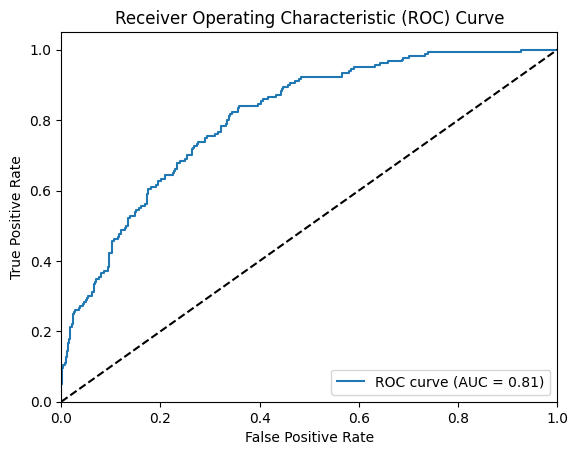

In [186]:
# Plot ROC curve
naive_bayes_fpr, naive_bayes_tpr, thresholds = roc_curve(y, y_prob_naive)
plt.plot(naive_bayes_fpr, naive_bayes_tpr, label='ROC curve (AUC = %0.2f)' % naive_bayes_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

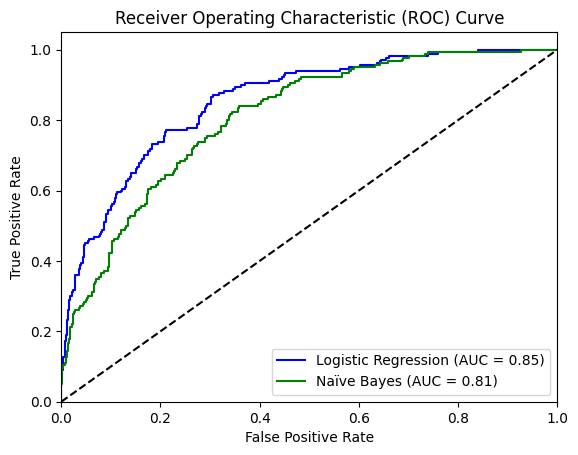

In [187]:
plt.plot(logistic_fpr, logistic_tpr, color= "blue", label='Logistic Regression (AUC = %0.2f)' % logistic_auc)
plt.plot(naive_bayes_fpr, naive_bayes_tpr, color = "green", label='Naïve Bayes (AUC = %0.2f)' % naive_bayes_auc)

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [188]:
# Combine service and product variables
data['Recency_Total'] = data['Recency_Service'] + data['Recency_Product']
data['Bill_Total'] = data['Bill_Service'] + data['Bill_Product']
# Drop individual service and product variables
data.drop(['Recency_Service', 'Recency_Product', 'Bill_Service', 'Bill_Product'], axis=1, inplace=True)

# Convert categorical variables to numerical representation
#data = pd.get_dummies(data, columns=['AGE'], drop_first=True)

# Define features (independent variables) and target variable
X = data.drop(columns=['Success'])
y = data['Success']

In [189]:
# SVM
svm_model = SVC(probability=True)

# Train the SVM model using the entire dataset
svm_model.fit(X, y)

# Make predictions on the entire dataset
y_prob_svm = svm_model.predict_proba(X)[:, 1]
y_pred_svm = svm_model.predict(X)
print("Naive Bayes:")
print(classification_report(y, y_pred_svm))

Naive Bayes:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       503
           1       0.00      0.00      0.00       180

    accuracy                           0.74       683
   macro avg       0.37      0.50      0.42       683
weighted avg       0.54      0.74      0.62       683



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
# Calculate AUC
auc_svm = roc_auc_score(y, y_prob_svm)
print('AUC (Support Vector Machine): %.3f' % auc_svm)

AUC (Support Vector Machine): 0.821


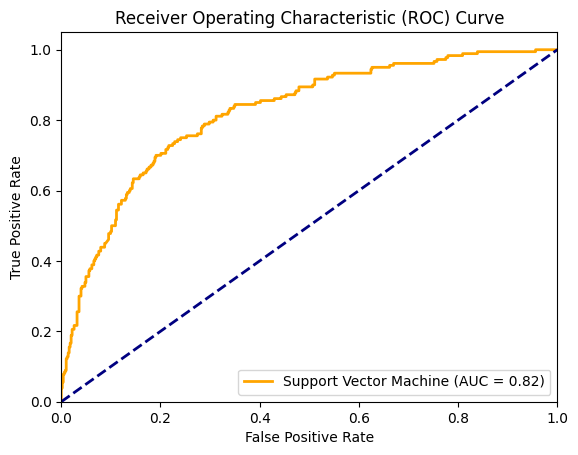

In [191]:
# Plot ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='Support Vector Machine (AUC = %0.2f)' % auc_svm)

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

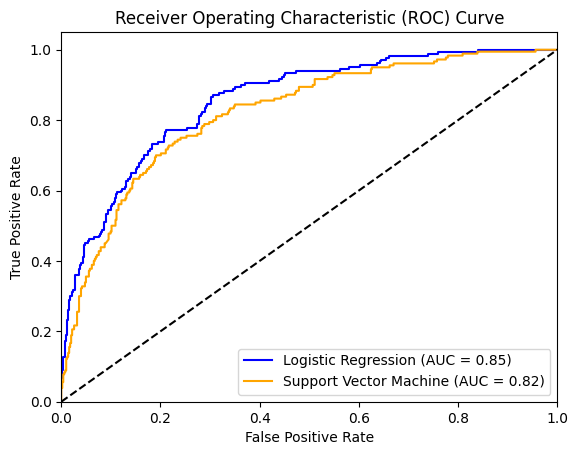

In [193]:
# Plot ROC curves for both models
plt.plot(logistic_fpr, logistic_tpr, color= "blue", label='Logistic Regression (AUC = %0.2f)' % logistic_auc)
plt.plot(fpr_svm, tpr_svm, color = "orange", label='Support Vector Machine (AUC = %0.2f)' % auc_svm)

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

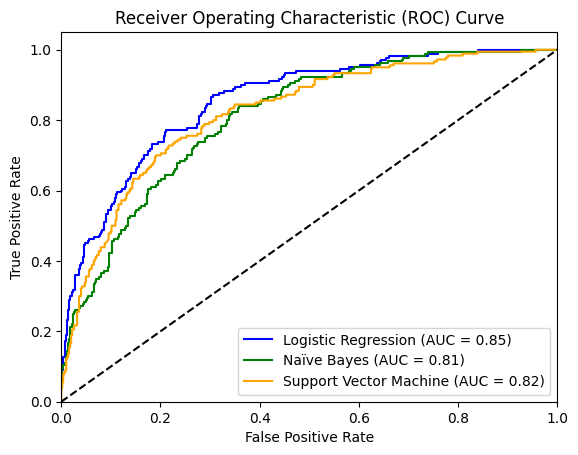

In [194]:
# Plot ROC Curves
plt.plot(logistic_fpr, logistic_tpr, color= "blue", label='Logistic Regression (AUC = %0.2f)' % logistic_auc)
plt.plot(naive_bayes_fpr, naive_bayes_tpr, color = "green", label='Naïve Bayes (AUC = %0.2f)' % naive_bayes_auc)
plt.plot(fpr_svm, tpr_svm, color = "orange", label='Support Vector Machine (AUC = %0.2f)' % auc_svm)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Logistic Regression achieved the highest accuracy at 0.85 and demonstrated superior recall for class 1 compared to other models. Despite Naive Bayes slightly lower accuracy of 0.81, it excelled in precision for class 1, outperforming SVM. On the other hand, Support Vector Machine attained an accuracy of 0.82 with the highest recall for class 0.

Considering these metrics, Logistic Regression emerges as a promising choice due to its balanced performance and higher overall accuracy, consistent with insights gleaned from initial visualizations. The box plots provided valuable insights into feature distributions, which evidently influenced the model evaluation outcomes.